# Exploratory Data Analysis

In [1]:
! pip install numpy pandas matplotlib seaborn dask

# Import libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import dask.dataframe as dd

from zipfile import ZipFile

# Assert that Python version is 3.7 or higher
assert (sys.version_info.major == 3 and sys.version_info.minor >= 7), "This notebook requires Python 3.7 or higher."

In [2]:
# Read data into respective dataframes
companies_zip_file = ZipFile('../data/companies.csv.zip')
companies = pd.read_csv(companies_zip_file.open('companies.csv'), index_col='ticker')

entities_zip_file = ZipFile('../data/entities.csv.zip')
entities = pd.read_csv(entities_zip_file.open('entities.csv'))

tweets_zip_file = ZipFile('../data/tweets.csv.zip')
tweets = pd.read_csv(tweets_zip_file.open('tweets.csv'), index_col='id')

users_zip_file = ZipFile('../data/users.csv.zip')
users = pd.read_csv(users_zip_file.open('users.csv'), index_col='id', error_bad_lines=False)

C:\Users\amirsolei\AppData\Local\Temp\ipykernel_10672\1206268637.py:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv(users_zip_file.open('users.csv'), index_col='id', error_bad_lines=False)
Skipping line 369555: expected 16 fields, saw 17

Skipping line 509344: expected 16 fields, saw 17

C:\Users\amirsolei\AppData\Local\Temp\ipykernel_10672\1206268637.py:12: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv(users_zip_file.open('users.csv'), index_col='id', error_bad_lines=False)


In [3]:
# Print the shape of each dataframe
print(f'companies: {companies.shape}')
print(f'entities: {entities.shape}')
print(f'tweets: {tweets.shape}')
print(f'users: {users.shape}')

companies: (30032, 3)
entities: (36482461, 3)
tweets: (9091539, 9)
users: (597411, 15)


In [4]:
companies.head()

,name,exchange,capitalization
ticker,,,
A,Agilent Technologies,NYSE,1.915000e+10
AA,Alcoa Corp,NYSE,6.480000e+09
AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09


In [5]:
entities.head()

,tweet_id,entity_type,text
0,865191269030612992,url,http://ih.advfn.com/p.php?pid=nmona&article=74...
1,865191269030612992,symbol,AMGN
2,865191271899570176,url,https://finance.yahoo.com/news/amgen-submits-b...
3,865191271899570176,hashtag,FDA
4,865191271899570176,hashtag,biotech


In [6]:
tweets.head(3)

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
id,,,,,,,,,
865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:00 +0000 2017
865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:01 +0000 2017
865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",Thu May 18 22:00:02 +0000 2017


In [7]:
users.head(3)

,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,verified,description,created_at,bot
id,,,,,,,,,,,,,,,
859451814940336128,Nao,sovereignao,2460,181,399,5247,6,NaN,en,Pacific Time (US & Canada),HODLing fast on,NaN,Self-sovereign,Tue May 02 16:57:35 +0000 2017,NaN
44060322,Benzinga.com,Benzinga,126228,59237,1617,2774,2310,http://www.benzinga.com/,en,Eastern Time (US & Canada),Zingernation,1.0,Financial news site. Creator of Benzinga Pro: ...,Tue Jun 02 04:43:10 +0000 2009,NaN
713570637306986496,Best Investings,bestinvestings,2718,27,0,0,3,NaN,en,Pacific Time (US & Canada),IN THE CHARTS,NaN,May or may not give you the best investing adv...,Sat Mar 26 03:37:52 +0000 2016,NaN


In [8]:
pd.options.mode.chained_assignment = None

# Search the text column for cashtags and store them in a new column
tweets['cashtags'] = tweets['text'].str.findall(r'\$\w+')

In [9]:
# Find the number of cashtags in each tweet
tweets['cashtags_count'] = tweets['cashtags'].str.len()

In [10]:
# Find the count of each cashtag
cashtags_count = tweets['cashtags'].explode().value_counts().reset_index()
cashtags_count.columns = ['cashtag', 'count']
cashtags_count.head()

cashtags_count['cashtag'] = cashtags_count['cashtag'].str.replace('$', '', regex=True)
cashtags_count['cashtag'] = cashtags_count['cashtag'].str.upper()

# Check which cashtags are in the companies dataframe
cashtags_count['in_companies'] = cashtags_count['cashtag'].isin(companies.index)
cashtags_count.head()

,cashtag,count,in_companies
0,AAPL,277799,True
1,0,237086,False
2,AMZN,236923,True
3,ETH,235669,False
4,FB,216565,True


In [11]:
# Create a new dataframe with the cashtags that are in the companies dataframe
cashtags_count_companies = cashtags_count[cashtags_count['in_companies'] == True]
cashtags_count_companies = cashtags_count_companies.drop(columns=['in_companies'])

# Combine identical cashtags
cashtags_count_companies = cashtags_count_companies.groupby('cashtag').sum().sort_values(by='count', ascending=False).reset_index()

# Add the company name to the dataframe
cashtags_count_companies['name'] = cashtags_count_companies['cashtag'].apply(lambda x: companies.loc[x]['name'])
cashtags_count_companies.head(10)

,cashtag,count,name
0,AAPL,290321,Apple Inc.
1,AMZN,253827,"Amazon.com, Inc."
2,FB,231842,Facebook Inc
3,LTC,207854,LTC Properties Inc
4,TSLA,198757,Tesla Inc
5,SPY,165270,SPDR S&P 500 ETF Tru
6,NEO,153005,"NeoGenomics, Inc."
7,CHRO,136966,CHRON ORGANIZATION C
8,QQQ,131778,PowerShares QQQ Trus
9,NFLX,130887,"Netflix, Inc."


### Statistics on most (least) tweeted stocks

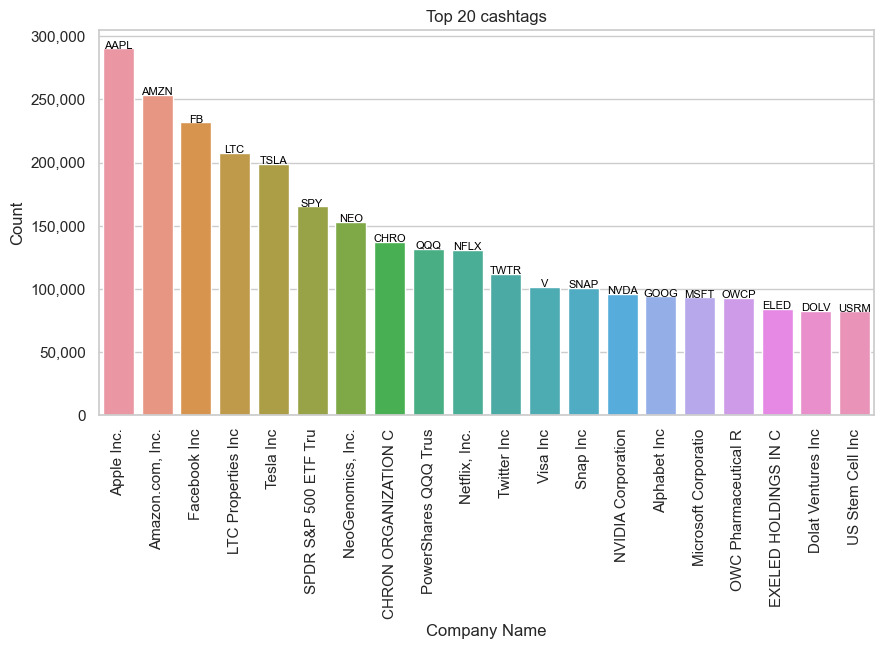

In [12]:
# Plot the top 20 cashtags
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
sns.barplot(x='name', y='count', data=cashtags_count_companies.iloc[:20])
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=90)
plt.title('Top 20 cashtags')
plt.xlabel('Company Name')
plt.ylabel('Count')

# Print the cashtag on each bar
for index, row in cashtags_count_companies.iloc[:20].iterrows():
    plt.text(row.name, row['count'], row['cashtag'], color='black', ha="center", fontfamily='sans-serif', fontsize=8)
plt.show()



In [13]:
# Filter dataframe with companies only from NASDAQ and NYSE
cashtags_count_nasdaq_nyse = cashtags_count_companies[cashtags_count_companies['cashtag'].isin(companies[companies['exchange'].isin(['NASDAQ', 'NYSE'])].index)]
cashtags_count_nasdaq_nyse.tail(10)

,cashtag,count,name
17282,HMH,1,Helios Multi Sector
17298,EMMT,1,iShares MSCI Emrg Mr
17354,TBOW,1,Trunkbow Internation
17393,SNS,1,Stewart & Stevenson
17396,HIH,1,Helios High Income F
17459,JACQ,1,Collabrium Japan Acq
17478,HSA,1,Helios Strategic Inc
17494,FMAX,1,Full Spectrum Inc
17540,RIBX,1,Melinta Therapeutics
17554,GAGA,1,Le Gaga Holdings Ltd


<span style='color:indianred'>Discussion</span>  
Printing the same plot for least tweeted stocks is redundant since many of companies on the least tweeted stocks (even when we only consider ones listed on the NYSE or NASDAQ) have a very small number of tweets or only one tweet. Therefore, instead of plotting the least tweeted stocks, we will plot number of companies with a certain number of tweets.

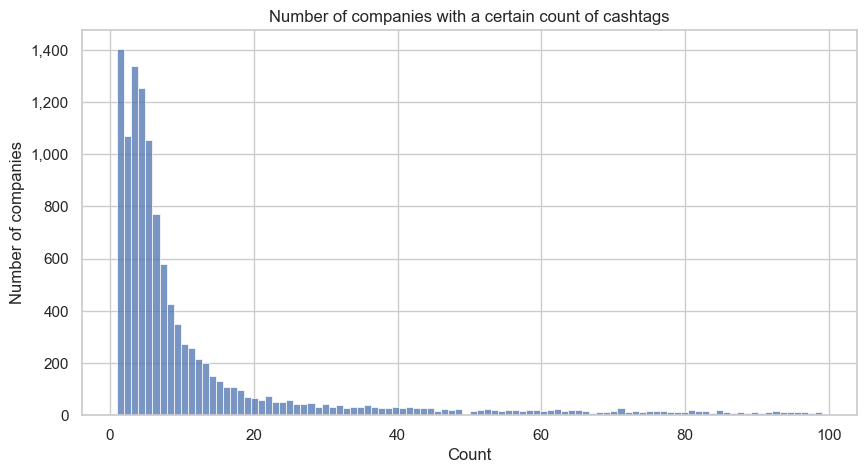

In [14]:
# Plot the number of companies with a certain count of cashtags
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

# When plotting consider only the companies with less than 100 cashtags
sns.histplot(x='count', data=cashtags_count_companies[cashtags_count_companies['count'] < 100], bins=100)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Number of companies with a certain count of cashtags')
plt.xlabel('Count')
plt.ylabel('Number of companies')
plt.show()

In [15]:
# Add column of exchange to our cashtag count
cashtags_count_companies['exchange'] = cashtags_count_companies['cashtag'].apply(lambda x: companies.loc[x]['exchange'])
cashtags_count_companies.head()

,cashtag,count,name,exchange
0,AAPL,290321,Apple Inc.,NASDAQ
1,AMZN,253827,"Amazon.com, Inc.",NASDAQ
2,FB,231842,Facebook Inc,NASDAQ
3,LTC,207854,LTC Properties Inc,NYSE
4,TSLA,198757,Tesla Inc,NASDAQ


In [16]:
# Add market cap to our cashtag count
cashtags_count_companies['capitalization'] = cashtags_count_companies['cashtag'].apply(lambda x: companies.loc[x]['capitalization'])
cashtags_count_companies['capitalization'] = cashtags_count_companies['capitalization'].apply(lambda x: 0 if not isinstance(x, (int, float)) else x)

# Add boolean columns for each exchange
cashtags_count_companies['NASDAQ'] = cashtags_count_companies['exchange'].apply(lambda x: True if 'NASDAQ' in x else False)
cashtags_count_companies['NYSE'] = cashtags_count_companies['exchange'].apply(lambda x: True if 'NYSE' in x else False)
cashtags_count_companies['NYSEARC'] = cashtags_count_companies['exchange'].apply(lambda x: True if 'NYSEARC' in x else False)
cashtags_count_companies['NYSEMKT'] = cashtags_count_companies['exchange'].apply(lambda x: True if 'NYSEMKT' in x else False)
cashtags_count_companies['OTCMKTS'] = cashtags_count_companies['exchange'].apply(lambda x: True if 'OTCMKTS' in x else False)

cashtags_count_companies.head()

,cashtag,count,name,exchange,capitalization,NASDAQ,NYSE,NYSEARC,NYSEMKT,OTCMKTS
0,AAPL,290321,Apple Inc.,NASDAQ,7.485500e+11,True,False,False,False,False
1,AMZN,253827,"Amazon.com, Inc.",NASDAQ,4.574300e+11,True,False,False,False,False
2,FB,231842,Facebook Inc,NASDAQ,4.413200e+11,True,False,False,False,False
3,LTC,207854,LTC Properties Inc,NYSE,1.950000e+09,False,True,False,False,False
4,TSLA,198757,Tesla Inc,NASDAQ,5.394000e+10,True,False,False,False,False


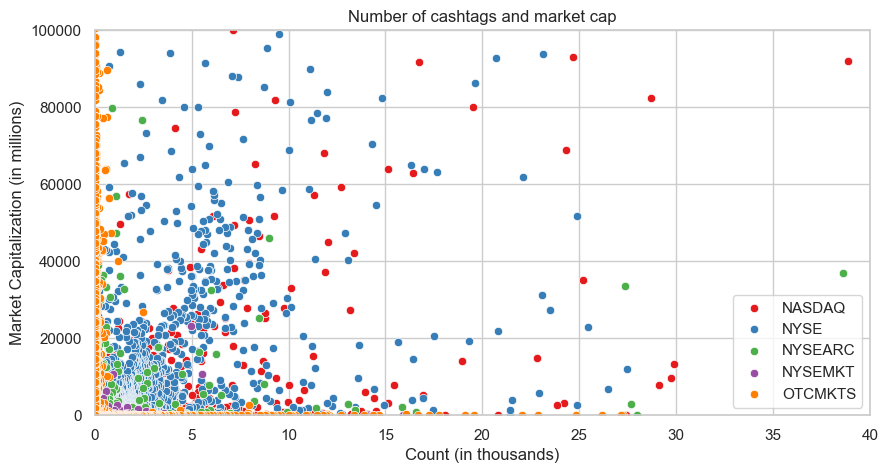

In [17]:
# Plot a scatter plot of the number of cashtags and the market cap of the company
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
sns.scatterplot(x='count', y='capitalization', data=cashtags_count_companies[cashtags_count_companies['NASDAQ'] == True], color='#e41a1c', label='NASDAQ')
sns.scatterplot(x='count', y='capitalization', data=cashtags_count_companies[cashtags_count_companies['NYSE'] == True], color='#377eb8', label='NYSE')
sns.scatterplot(x='count', y='capitalization', data=cashtags_count_companies[cashtags_count_companies['NYSEARC'] == True], color='#4daf4a', label='NYSEARC')
sns.scatterplot(x='count', y='capitalization', data=cashtags_count_companies[cashtags_count_companies['NYSEMKT'] == True], color='#984ea3', label='NYSEMKT')
sns.scatterplot(x='count', y='capitalization', data=cashtags_count_companies[cashtags_count_companies['OTCMKTS'] == True], color='#ff7f00', label='OTCMKTS')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: int(x/10**3)))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: int(x/10**6)))
plt.title('Number of cashtags and market cap')
plt.xlabel('Count (in thousands)')
plt.ylabel('Market Capitalization (in millions)')
plt.xlim(0, 4*10**4)
plt.ylim(0, 10**11)
plt.legend()
plt.show()

In [18]:
# Change created_at to datetime object
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

In [29]:
# Add hour column to our tweets
tweets['hour'] = tweets['created_at'].apply(lambda x: x.hour)
tweets.head(3)

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,cashtags,cashtags_count,hour,day
id,,,,,,,,,,,,,
865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",2017-05-18 22:00:00+00:00,[$ltc],1,22,Thursday
865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",2017-05-18 22:00:01+00:00,"[$IEF, $TLT]",2,22,Thursday
865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",2017-05-18 22:00:02+00:00,[$NLNK],1,22,Thursday


### Statistics on distributions of all financial tweets over time

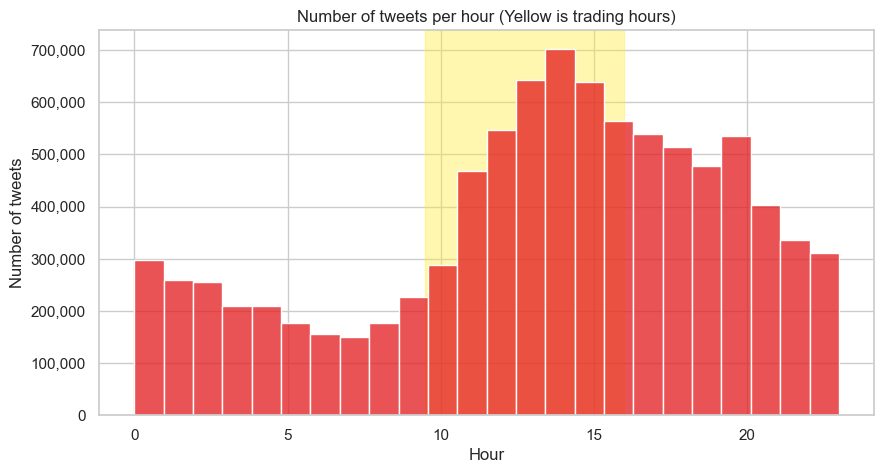

In [20]:
# Plot the number of tweets per hour
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
plt.axvspan(9.5, 16, alpha=0.4, color='#ffeb3b')
sns.histplot(x='hour', data=tweets, bins=24)
plt.title('Number of tweets per hour (Yellow is trading hours)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('Hour')
plt.ylabel('Number of tweets')
plt.show()

In [154]:
aapl_tweets = tweets[tweets['cashtags'].apply(lambda x: ('$aapl' in list(y.lower() for y in list(x))))]
tsla_tweets = tweets[tweets['cashtags'].apply(lambda x: ('$tsla' in list(y.lower() for y in list(x))))]

### Statistics on distribution of tweets including individual stocks (at least 2) over time

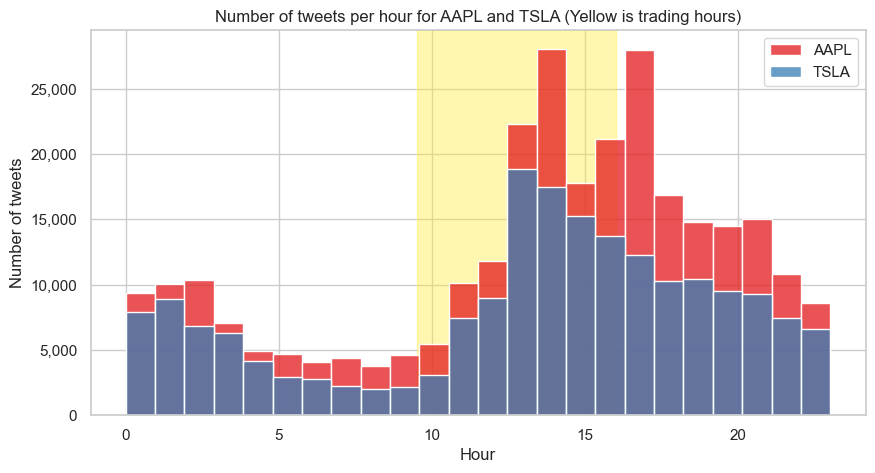

In [155]:
# Plot the number of tweets per hour for AAPL and TSLA separately in the same plot
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
plt.axvspan(9.5, 16, alpha=0.4, color='#ffeb3b')
sns.histplot(x='hour', data=aapl_tweets, bins=24, label='AAPL')
sns.histplot(x='hour', data=tsla_tweets, bins=24, label='TSLA')
plt.title('Number of tweets per hour for AAPL and TSLA (Yellow is trading hours)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('Hour')
plt.ylabel('Number of tweets')

# Modify legend to show two lines
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

In [156]:
# Add a column for the day of the week
tweets['day'] = tweets['created_at'].apply(lambda x: x.day_name())
tweets.head(3)

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,cashtags,cashtags_count,hour,day,retweet
id,,,,,,,,,,,,,,
865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",2017-05-18 22:00:00+00:00,[$ltc],1,22,Thursday,0
865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",2017-05-18 22:00:01+00:00,"[$IEF, $TLT]",2,22,Thursday,0
865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",2017-05-18 22:00:02+00:00,[$NLNK],1,22,Thursday,0


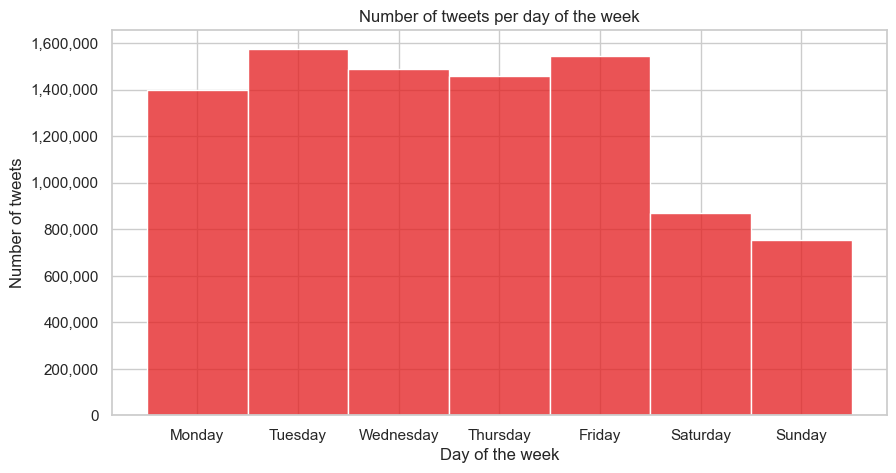

In [157]:
tweets['day'] = pd.Categorical(tweets['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Plot the number of tweets per day of the week
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
sns.histplot(x='day', data=tweets, bins=7, discrete=True, stat='count')
plt.title('Number of tweets per day of the week')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('Day of the week')
plt.ylabel('Number of tweets')
plt.show()

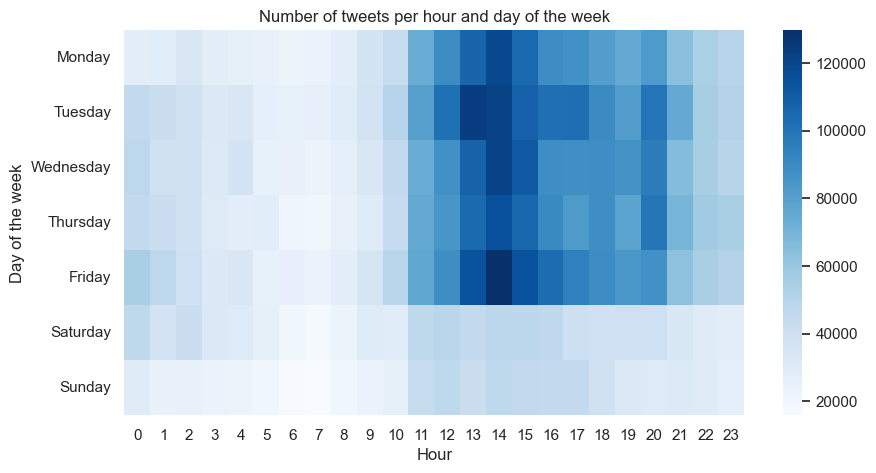

In [158]:
# Plot heat map of the number of tweets per hour and day of the week
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
sns.heatmap(tweets.groupby(['day', 'hour']).size().unstack(), cmap='Blues')
plt.title('Number of tweets per hour and day of the week')
plt.xlabel('Hour')
plt.ylabel('Day of the week')
plt.show()

### Statistics on distribution of retweets per tweets including individual stocks (at least 2) over time

In [159]:
# Set the column retweet to the number of retweets for each tweet
retweeted_tweets = tweets['retweeted_status_id'].value_counts()
retweeted_tweets = retweeted_tweets[retweeted_tweets.index != 0]
tweets['retweet'] = tweets.index.map(lambda x: retweeted_tweets[x] if x in retweeted_tweets.index else 0)
tweets.head(3)

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,cashtags,cashtags_count,hour,day,retweet
id,,,,,,,,,,,,,,
865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",2017-05-18 22:00:00+00:00,[$ltc],1,22,Thursday,0
865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",2017-05-18 22:00:01+00:00,"[$IEF, $TLT]",2,22,Thursday,0
865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",2017-05-18 22:00:02+00:00,[$NLNK],1,22,Thursday,0


In [160]:
tweets[tweets['retweet'] != 0].head(5)

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,cashtags,cashtags_count,hour,day,retweet
id,,,,,,,,,,,,,,
865326135974006790,https://t.co/uy1J6ORiZ6 $140 loss $TYHT See my...,23390520,0,0,0,0,en,"<a href=""http://www.profit.ly"" rel=""nofollow"">...",2017-05-18 22:00:02+00:00,"[$140, $TYHT]",2,22,Thursday,2
865326136968007681,"https://t.co/WgmfPFMVff $5,348 loss $PULM See ...",11247222,0,0,0,0,en,"<a href=""http://www.profit.ly"" rel=""nofollow"">...",2017-05-18 22:00:02+00:00,"[$5, $PULM]",2,22,Thursday,1
865326140017082368,The Internet Of Things = The Internet Of NAND ...,1958752610,0,0,0,0,en,"<a href=""http://seekingalpha.com"" rel=""nofollo...",2017-05-18 22:00:03+00:00,[$MU],1,22,Thursday,1
865326171818528769,Top 3 $BTC $NMC on @Poloniex +14% $BTC $TRIG o...,2300634288,0,0,0,0,en,"<a href=""http://coindera.com"" rel=""nofollow"">C...",2017-05-18 22:00:11+00:00,"[$BTC, $NMC, $BTC, $TRIG, $BTC, $BRX]",6,22,Thursday,1
865326212545216514,Estamos siendo testigos de un nuevo cambio de ...,704649556441604096,0,0,0,0,es,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",2017-05-18 22:00:20+00:00,[$GOOG],1,22,Thursday,1


In [161]:
# Set the column retweet to the number of retweets for each tweet
retweeted_aapl_tweets = aapl_tweets['retweeted_status_id'].value_counts()
retweeted_aapl_tweets = retweeted_aapl_tweets[retweeted_aapl_tweets.index != 0]
aapl_tweets['retweet'] = aapl_tweets.index.map(lambda x: retweeted_aapl_tweets[x] if x in retweeted_aapl_tweets.index else 0)

retweeted_tsla_tweets = tsla_tweets['retweeted_status_id'].value_counts()
retweeted_tsla_tweets = retweeted_tsla_tweets[retweeted_tsla_tweets.index != 0]
tsla_tweets['retweet'] = tsla_tweets.index.map(lambda x: retweeted_tsla_tweets[x] if x in retweeted_tsla_tweets.index else 0)

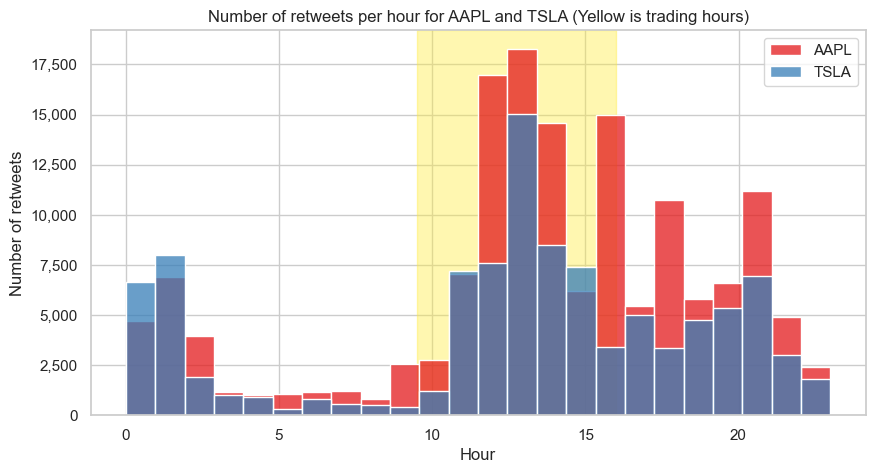

In [162]:
# Plot the number of retweets per hour for AAPL and TSLA separately in the same plot
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
plt.axvspan(9.5, 16, alpha=0.4, color='#ffeb3b')
sns.histplot(x='hour', data=aapl_tweets, bins=24, label='AAPL', weights='retweet')
sns.histplot(x='hour', data=tsla_tweets, bins=24, label='TSLA', weights='retweet')
plt.title('Number of retweets per hour for AAPL and TSLA (Yellow is trading hours)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('Hour')
plt.ylabel('Number of retweets')

# Modify legend to show two lines
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

In [163]:
# Create a dataframe with the number of tweets and retweets per hour
tweets_per_hour = tweets.groupby('hour').size().reset_index(name='tweets')
tweets_per_hour['retweets'] = tweets.groupby('hour')['retweet'].sum().reset_index(name='retweets')['retweets']

# Create columns for the number of tweets and retweets per hour for AAPL and TSLA in tweets_per_hour
tweets_per_hour['aapl_tweets'] = aapl_tweets.groupby('hour').size().reset_index(name='aapl_tweets')['aapl_tweets']
tweets_per_hour['aapl_retweets'] = aapl_tweets.groupby('hour')['retweet'].sum().reset_index(name='aapl_retweets')['aapl_retweets']
tweets_per_hour['tsla_tweets'] = tsla_tweets.groupby('hour').size().reset_index(name='tsla_tweets')['tsla_tweets']
tweets_per_hour['tsla_retweets'] = tsla_tweets.groupby('hour')['retweet'].sum().reset_index(name='tsla_retweets')['tsla_retweets']

tweets_per_hour = tweets_per_hour.set_index('hour')
tweets_per_hour.head()


,tweets,retweets,aapl_tweets,aapl_retweets,tsla_tweets,tsla_retweets
hour,,,,,,
0,298360,86646,9393,4680,7906,6642
1,259517,58775,10092,6911,8930,8017
2,255118,47011,10394,3933,6818,1905
3,209276,46127,7068,1151,6295,1028
4,209727,38347,4911,998,4191,927


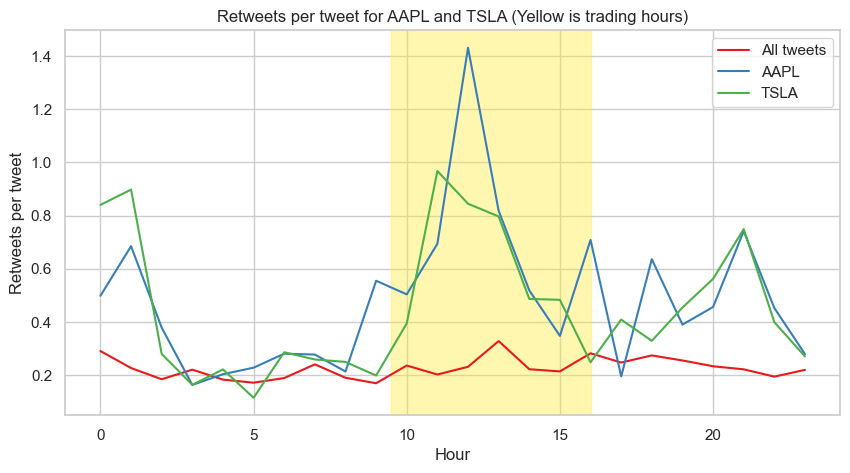

In [164]:
# Plot retweets per tweet for AAPL, TSLA and all tweets
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
plt.axvspan(9.5, 16, alpha=0.4, color='#ffeb3b')
sns.lineplot(data=tweets_per_hour['retweets']/tweets_per_hour['tweets'], label='All tweets')
sns.lineplot(data=tweets_per_hour['aapl_retweets']/tweets_per_hour['aapl_tweets'], label='AAPL')
sns.lineplot(data=tweets_per_hour['tsla_retweets']/tweets_per_hour['tsla_tweets'], label='TSLA')
plt.title('Retweets per tweet for AAPL and TSLA (Yellow is trading hours)')
plt.xlabel('Hour')
plt.ylabel('Retweets per tweet')
plt.show()

### Statistics on most important financial information on individual stocks (at least 2) computed solely from the financial information (not the tweets)

In [165]:
companies.head()

,name,exchange,capitalization
ticker,,,
A,Agilent Technologies,NYSE,1.915000e+10
AA,Alcoa Corp,NYSE,6.480000e+09
AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09


In [166]:
# Mean, variance, standard deviation, minimum and maximum of market capitalization for each exchange
companies.groupby('exchange').agg({'capitalization': ['mean', 'var', 'std', 'min', 'max']})

capitalization                                                    
                   mean           var           std       min           max
exchange                                                                   
NASDAQ     3.940251e+09  8.734746e+20  2.955460e+10   35000.0  7.485500e+11
NYSE       1.023234e+10  8.885482e+20  2.980853e+10      10.0  4.302300e+11
NYSEARCA   3.217465e+09  1.547518e+20  1.243993e+10  144500.0  2.341300e+11
NYSEMKT    8.052759e+08  5.094430e+19  7.137528e+09      12.0  1.239800e+11
OTCMKTS    2.817668e+09  1.360649e+20  1.166468e+10       0.0  3.416800e+11

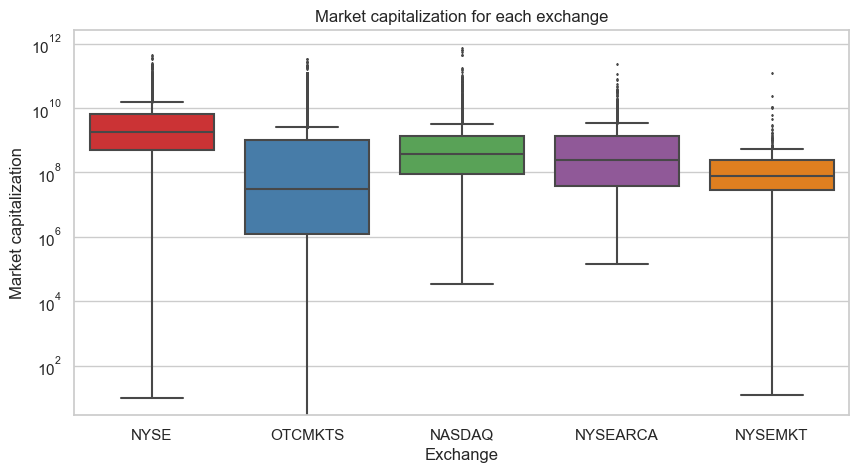

In [167]:
# Boxplot of market capitalization for each exchange with y-axis on log scale
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
# Set points in the boxplot to be smaller and remove the whiskers
sns.boxplot(x='exchange', y='capitalization', data=companies, fliersize=1)
plt.yscale('log')
plt.title('Market capitalization for each exchange')
plt.xlabel('Exchange')
plt.ylabel('Market capitalization')
plt.show()

### Time series movement directions through time for individual stocks (at least 2)

In [171]:
# Change created_at to timestamp for aapl_tweets
aapl_tweets['created_at'] = pd.to_datetime(aapl_tweets['created_at'])
aapl_tweets.head()

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,cashtags,cashtags_count,hour,day,retweet
id,,,,,,,,,,,,,,
865326177589874688,Why Fitbit Inc. Shareholders Have Something to...,42398820,0,0,0,0,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2017-05-18 22:00:12+00:00,"[$AAPL, $QCOM, $GRMN, $FIT]",4,22,Thursday,0
865326216479481856,RT SeekingAlpha: May Shopping List: Building U...,9555372,0,0,0,0,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",2017-05-18 22:00:21+00:00,"[$AAPL, $D, $PEP]",3,22,Thursday,0
865326530951598080,RT @AlertTrade: May Shopping List: Building Up...,3194938413,0,0,865324650284187648,121158213,en,"<a href=""http://twitter.com/download/android"" ...",2017-05-18 22:01:36+00:00,"[$AAPL, $D, $PEP]",3,22,Thursday,0
865326760426123264,RT @learnstocks101: Free video w/setups for Ma...,2801334731,0,0,865325694246686724,322963627,en,"<a href=""https://roundteam.co"" rel=""nofollow"">...",2017-05-18 22:02:31+00:00,"[$AAPL, $MSFT, $NVDA, $AMAT, $SHOP]",5,22,Thursday,0
865326934380728320,This would be incredibly helpful (even life-sa...,14198308,0,0,0,0,en,"<a href=""http://tapbots.com/software/tweetbot/...",2017-05-18 22:03:12+00:00,[$AAPL],1,22,Thursday,1


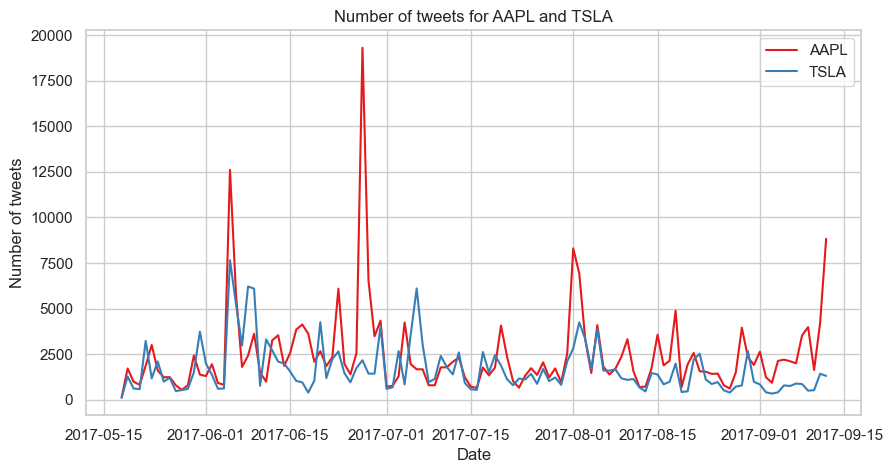

In [176]:
# Plot the number of tweets for AAPL and TSLA per day
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
sns.lineplot(data=aapl_tweets.groupby(aapl_tweets['created_at'].dt.date).size(), label='AAPL')
sns.lineplot(data=tsla_tweets.groupby(tsla_tweets['created_at'].dt.date).size(), label='TSLA')
plt.title('Number of tweets for AAPL and TSLA')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()

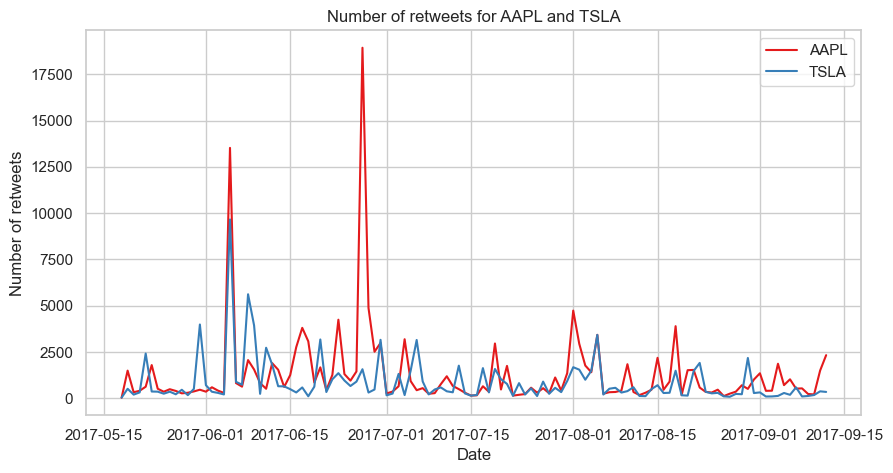

In [177]:
# Plot the number of retweets for AAPL and TSLA per day
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
sns.lineplot(data=aapl_tweets.groupby(aapl_tweets['created_at'].dt.date)['retweet'].sum(), label='AAPL')
sns.lineplot(data=tsla_tweets.groupby(tsla_tweets['created_at'].dt.date)['retweet'].sum(), label='TSLA')
plt.title('Number of retweets for AAPL and TSLA')
plt.xlabel('Date')
plt.ylabel('Number of retweets')
plt.show()

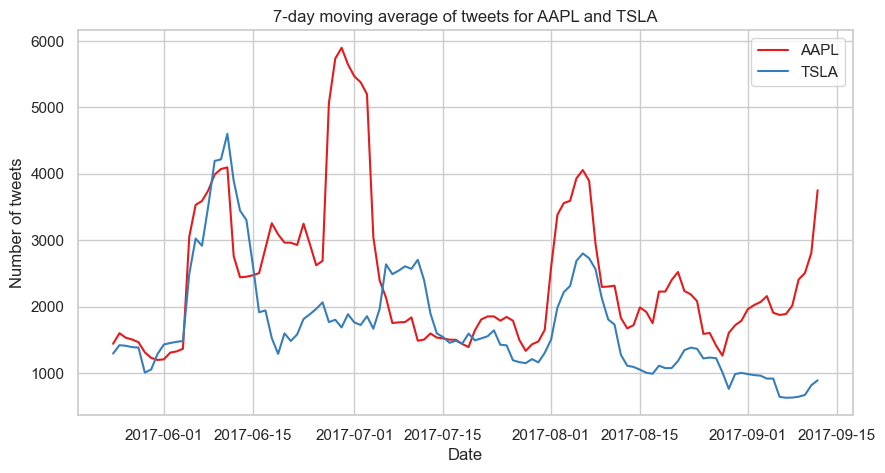

In [194]:
# Plot moving average for AAPL and TSLA
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
sns.lineplot(data=aapl_tweets.groupby(aapl_tweets['created_at'].dt.date).size().rolling(7).mean(), label='AAPL')
sns.lineplot(data=tsla_tweets.groupby(tsla_tweets['created_at'].dt.date).size().rolling(7).mean(), label='TSLA')
plt.title('7-day moving average of tweets for AAPL and TSLA')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()

### Co-occurrence of various stocks in the same tweets

In [207]:
# Select tweets that appear in both aapl_tweets and tsla_tweets
aapl_tsla_tweets = aapl_tweets[aapl_tweets.index.isin(tsla_tweets.index)]

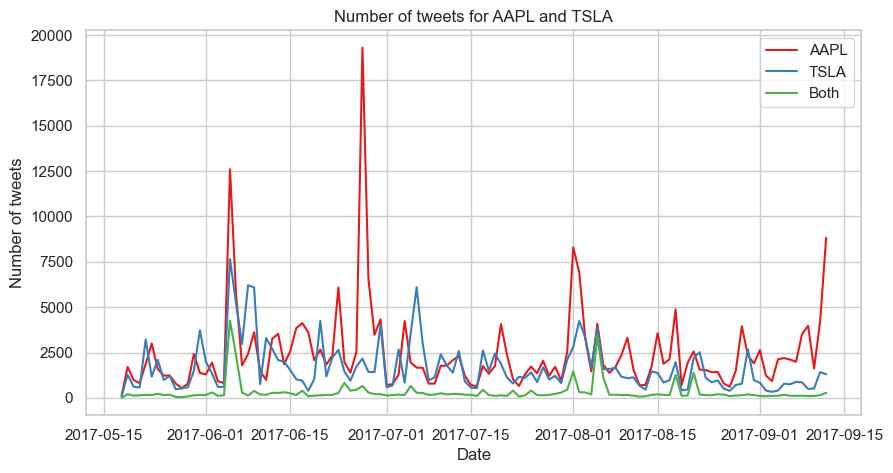

In [208]:
# Plot the number of tweets for AAPL and TSLA per day
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
sns.lineplot(data=aapl_tweets.groupby(aapl_tweets['created_at'].dt.date).size(), label='AAPL')
sns.lineplot(data=tsla_tweets.groupby(tsla_tweets['created_at'].dt.date).size(), label='TSLA')
sns.lineplot(data=aapl_tsla_tweets.groupby(aapl_tsla_tweets['created_at'].dt.date).size(), label='Both')
plt.title('Number of tweets for AAPL and TSLA')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()

In [231]:
NYSE_arr = companies[companies['exchange'] == 'NYSE'].index.values
NASDAQ_arr = companies[companies['exchange'] == 'NASDAQ'].index.values
OTCMKTS_arr = companies[companies['exchange'] == 'OTCMKTS'].index.values
NYSEARCA_arr = companies[companies['exchange'] == 'NYSEARCA'].index.values
NYSEMKT_arr = companies[companies['exchange'] == 'NYSEMKT'].index.values


tweets['cashtags'] = tweets['cashtags'].apply(lambda x: [i.upper().replace('$', '') for i in x])
tweets.head(3)

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,cashtags,cashtags_count,hour,day,retweet
id,,,,,,,,,,,,,,
865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",2017-05-18 22:00:00+00:00,[LTC],1,22,Thursday,0
865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",2017-05-18 22:00:01+00:00,"[IEF, TLT]",2,22,Thursday,0
865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",2017-05-18 22:00:02+00:00,[NLNK],1,22,Thursday,0


In [238]:
# Sample one percent of tweets
sample = tweets.sample(frac=0.01, random_state=1)
sample['NYSE'] = sample['cashtags'].apply(lambda x: len(set(x).intersection(NYSE_arr)))
sample['NASDAQ'] = sample['cashtags'].apply(lambda x: len(set(x).intersection(NASDAQ_arr)))
sample['OTCMKTS'] = sample['cashtags'].apply(lambda x: len(set(x).intersection(OTCMKTS_arr)))
sample['NYSEARCA'] = sample['cashtags'].apply(lambda x: len(set(x).intersection(NYSEARCA_arr)))
sample['NYSEMKT'] = sample['cashtags'].apply(lambda x: len(set(x).intersection(NYSEMKT_arr)))
sample.head()

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,cashtags,cashtags_count,hour,day,retweet,NYSE,NASDAQ,OTCMKTS,NYSEARCA,NYSEMKT
id,,,,,,,,,,,,,,,,,,,
884773681628577797,Want the latest upgrades &amp; downgrades for ...,992182100,0,0,0,0,en,"<a href=""https://zapier.com/"" rel=""nofollow"">Z...",2017-07-11 13:57:38+00:00,"[OMG, IVR, DNACF, UE, HCBK]",5,13,Tuesday,0,3,1,1,0,0
895995832742424578,RT @RihnoVN: $AMP orderbook atm :) https://t.c...,866894998536671232,0,0,895995082481876992,759019410845675521,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2017-08-11 13:10:27+00:00,[AMP],1,13,Friday,0,1,0,0,0,0
901790072550420481,"As Lee Enterprises $LEE Stock Declined, Silver...",1450478228,0,0,0,0,en,"<a href=""https://santimes.com"" rel=""nofollow"">...",2017-08-27 12:54:42+00:00,"[LEE, 608]",2,12,Sunday,0,1,0,0,0,0
868451459452379137,RT @BVZ_Investools: Be sure to read my latest ...,2696641002,0,0,867892446394552325,816674790819897344,en,"<a href=""http://twitter.com/#!/download/ipad"" ...",2017-05-27 12:58:57+00:00,"[PG, SPX, KO]",3,12,Saturday,0,2,0,0,0,0
900020718095790080,RT @TRUEMag: A$AP Mob Premieres Single “Feel$ ...,36564443,0,0,900015477790916609,50384850,en,"<a href=""http://twitter.com/download/android"" ...",2017-08-22 15:43:55+00:00,"[AP, O]",2,15,Tuesday,0,2,0,0,0,0


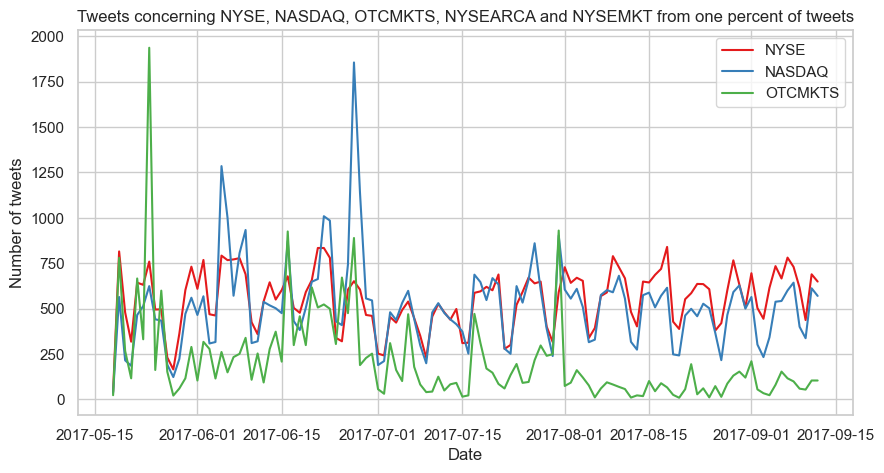

In [241]:
# Plot the number tweets for NYSE, NASDAQ, OTCMKTS, NYSEARCA and NYSEMKT markets
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
sns.lineplot(data=sample.groupby(sample['created_at'].dt.date)['NYSE'].sum(), label='NYSE')
sns.lineplot(data=sample.groupby(sample['created_at'].dt.date)['NASDAQ'].sum(), label='NASDAQ')
sns.lineplot(data=sample.groupby(sample['created_at'].dt.date)['OTCMKTS'].sum(), label='OTCMKTS')
# sns.lineplot(data=sample.groupby(sample['created_at'].dt.date)['NYSEARCA'].sum(), label='NYSEARCA')
# sns.lineplot(data=sample.groupby(sample['created_at'].dt.date)['NYSEMKT'].sum(), label='NYSEMKT')
plt.title('Tweets concerning NYSE, NASDAQ, OTCMKTS, NYSEARCA and NYSEMKT from one percent of tweets')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()

In [ ]:
# Code takes over 110 minutes to run, so we used a one percent sample for exploratory analysis
tweets['NYSE'] = tweets['cashtags'].apply(lambda x: len(set(x).intersection(NYSE_arr)))
tweets['NASDAQ'] = tweets['cashtags'].apply(lambda x: len(set(x).intersection(NASDAQ_arr)))
tweets['OTCMKTS'] = tweets['cashtags'].apply(lambda x: len(set(x).intersection(OTCMKTS_arr)))
tweets['NYSEARCA'] = tweets['cashtags'].apply(lambda x: len(set(x).intersection(NYSEARCA_arr)))
tweets['NYSEMKT'] = tweets['cashtags'].apply(lambda x: len(set(x).intersection(NYSEMKT_arr)))
tweets.head()

In [254]:
# Filter tweets that have NYSE or NASDAQ cashtags
nyse_nasdaq_sample = sample[(sample['NYSE'] > 0) | (sample['NASDAQ'] > 0)]
low_cap_sample = sample[(sample['NYSE'] == 0) & (sample['NASDAQ'] == 0)]
nyse_nasdaq_sample.head(3)

,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,cashtags,cashtags_count,hour,day,retweet,NYSE,NASDAQ,OTCMKTS,NYSEARCA,NYSEMKT
id,,,,,,,,,,,,,,,,,,,
884773681628577797,Want the latest upgrades &amp; downgrades for ...,992182100,0,0,0,0,en,"<a href=""https://zapier.com/"" rel=""nofollow"">Z...",2017-07-11 13:57:38+00:00,"[OMG, IVR, DNACF, UE, HCBK]",5,13,Tuesday,0,3,1,1,0,0
895995832742424578,RT @RihnoVN: $AMP orderbook atm :) https://t.c...,866894998536671232,0,0,895995082481876992,759019410845675521,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2017-08-11 13:10:27+00:00,[AMP],1,13,Friday,0,1,0,0,0,0
901790072550420481,"As Lee Enterprises $LEE Stock Declined, Silver...",1450478228,0,0,0,0,en,"<a href=""https://santimes.com"" rel=""nofollow"">...",2017-08-27 12:54:42+00:00,"[LEE, 608]",2,12,Sunday,0,1,0,0,0,0


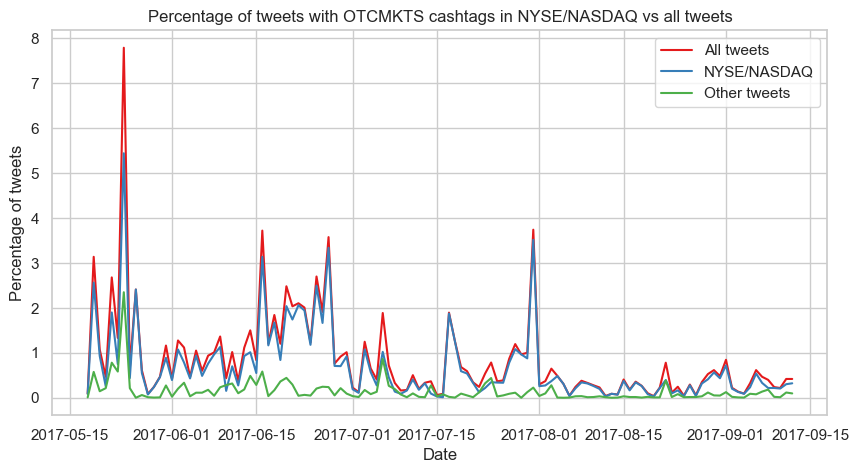

In [266]:
# Plot the percentage of tweets with OTCMKTS cashtags in NYSE/NASDAQ vs other tweets
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.set_palette("Set1")
sns.lineplot(data=sample.groupby(sample['created_at'].dt.date)['OTCMKTS'].sum() * 100 / sample['OTCMKTS'].sum(), label='All tweets')
sns.lineplot(data=nyse_nasdaq_sample.groupby(nyse_nasdaq_sample['created_at'].dt.date)['OTCMKTS'].sum() * 100 / sample['OTCMKTS'].sum(), label='NYSE/NASDAQ')
sns.lineplot(data=low_cap_sample.groupby(low_cap_sample['created_at'].dt.date)['OTCMKTS'].sum() * 100 / sample['OTCMKTS'].sum(), label='Other tweets')
plt.title('Percentage of tweets with OTCMKTS cashtags in NYSE/NASDAQ vs all tweets')
plt.xlabel('Date')
plt.ylabel('Percentage of tweets')
plt.show()

<span style='color:indianred'>Discussion</span>  
It seems that co-occurrence of tweets with cashtags related to NYSE/NASDAQ and tweets with cashtags related to OTCMKTS is not stochastic. In fact, most of the tweets mentioning OTCMKTS cashtags happen to mention NYSE/NASDAQ cashtags as well. This is probably due to the fact that OTCMKTS cashtags are not as popular as NYSE/NASDAQ cashtags and therefore, users or more likely bots are using popular cashtags to increase the popularity of OTCMKTS cashtags.